# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Chocolate Classification</p>

<p style="text-align:center; ">
<img src="https://media.istockphoto.com/photos/chocolate-pieces-stack-with-chocolate-flakes-drops-and-cocoa-powder-picture-id1316983928?b=1&k=20&m=1316983928&s=170667a&w=0&h=67curMjjqaGxb0xBsB57-eRmZvkC2UPHA9DkzXfFI3Y=" style='width: 600px; height: 300px;'>
</p>

<p style="text-align:justify; ">
Chocolate is a food product made from roasted and ground cocoa pods mixed with fat (e.g. cocoa butter) and powdered sugar to produce a solid confectionery. There are several types of chocolate, classified primarily according to the proportion of cocoa and fat content used in a particular formulation.
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#324459"> Importing Libraries</font>](#1)                   |7   | [<font color="#324459"> Model's Performance</font>](#7)   |     
|2   | [<font color="#324459"> About Dataset</font>](#2)                         |8  | [<font color="#324459"> Data Generation Using Augmentation</font>](#8)|      
|3   | [<font color="#324459"> Setting Directories</font>](#3)                     |9  | [<font color="#324459"> Performance Using Augmentation</font>](#9)   |    
|4   | [<font color="#324459"> Splitting Dataset</font>](#4)                       |10  | [<font color="#324459"> Performance Evaluation</font>](#10)    |       
|5   | [<font color="#324459"> Data Generation</font>](#5)      |11  | [<font color="#324459"> Thank You</font>](#11)  |     
|6   | [<font color="#324459"> Creating Model</font>](#6)              |

<a id="1"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [3]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install mplcyberpunk

<a id="2"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

The images are stored within the **/input/chocolate-classification/Chocolate Classification** directory. There is a subdirectory for each class, one for white chocolates and one for dark chocolates. Let's see how much each category contains.

In [4]:
source_path = "../input/chocolate-classification/Chocolate Classification"

source_path_white_chocolate = os.path.join(source_path, "White Chocolate")
source_path_dark_chocolate = os.path.join(source_path, "Dark Chocolate")


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_white_chocolate))} white chocolates.")
print(f"There are {len(os.listdir(source_path_dark_chocolate))} dark chocolates.")

There are 68 white chocolates.
There are 69 dark chocolates.


<a id="3"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Setting Directories</p>

So, we will need a directory for **"white_chocolates-vs-dark_chocolates"**, and subdirectories for training and validation. These in turn will need subdirectories for **"white chocolates"** and **"dark chocolates"**.

In [5]:
# Define root directory
root_dir = "/kaggle/working/white_chocolates-vs-dark_chocolates"

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path): 
  # os.makedirs() will create directories with intermediate subdirectories
  # os.path.join() will append the new directories to the root_path parameter

    os.makedirs(os.path.join(root_dir,"training"))
    os.makedirs(os.path.join(f"{root_dir}/training", "white chocolate"))
    os.makedirs(os.path.join(f"{root_dir}/training", "dark chocolate"))
    os.makedirs(os.path.join(root_dir,"validation"))
    os.makedirs(os.path.join(f"{root_dir}/validation", "white chocolate"))
    os.makedirs(os.path.join(f"{root_dir}/validation", "dark chocolate"))

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# Testing create_train_val_dirs() function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/kaggle/working/white_chocolates-vs-dark_chocolates/validation
/kaggle/working/white_chocolates-vs-dark_chocolates/training
/kaggle/working/white_chocolates-vs-dark_chocolates/validation/dark chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/validation/white chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/training/dark chocolate
/kaggle/working/white_chocolates-vs-dark_chocolates/training/white chocolate


<a id="4"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Splitting Dataset</p>

In [7]:
#  Spliting the whole data into train and test set
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    # SOURCE_DIR (string): directory path containing the images
    # TRAINING_DIR (string): directory path to be used for training
    # VALIDATION_DIR (string): directory path to be used for validation
    # SPLIT_SIZE (float): proportion of the dataset to be used for training
    

    processed_data = []
  
    for filename in os.listdir(SOURCE_DIR) :
        file = SOURCE_DIR + filename
        if os.path.getsize(file) > 0 :
            processed_data.append(filename)
        else :
            print(f"{filename} is zero length, so ignoring.")

    randomized_data = random.sample(processed_data, len(processed_data))

    training_length = int(len(randomized_data)*SPLIT_SIZE)
    validation_length = int(len(randomized_data) - training_length)

    training_data = randomized_data[:training_length]
    validation_data = randomized_data[-validation_length:]


    for filename in training_data :
        present_file = SOURCE_DIR + filename
        destination = TRAINING_DIR + filename
        copyfile(present_file, destination)

    
    for filename in validation_data :
        present_file = SOURCE_DIR + filename
        destination = VALIDATION_DIR + filename
        copyfile(present_file, destination)

In [8]:
# Testing split_data function

# Defining paths
WHITE_CHOCOLATE_SOURCE_DIR = "../input/chocolate-classification/Chocolate Classification/White Chocolate/"
DARK_CHOCOLATE_SOURCE_DIR = "../input/chocolate-classification/Chocolate Classification/Dark Chocolate/"

TRAINING_DIR = "/kaggle/working/white_chocolates-vs-dark_chocolates/training/"
VALIDATION_DIR = "/kaggle/working/white_chocolates-vs-dark_chocolates/validation/"

TRAINING_WHITE_CHOCOLATE_DIR = os.path.join(TRAINING_DIR, "white chocolate/")
VALIDATION_WHITE_CHOCOLATE_DIR = os.path.join(VALIDATION_DIR, "white chocolate/")

TRAINING_DARK_CHOCOLATE_DIR = os.path.join(TRAINING_DIR, "dark chocolate/")
VALIDATION_DARK_CHOCOLATE_DIR = os.path.join(VALIDATION_DIR, "dark chocolate/")

# Empty directories in case running this cell multiple times
if len(os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(TRAINING_WHITE_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DARK_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(TRAINING_DARK_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_WHITE_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(VALIDATION_WHITE_CHOCOLATE_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DARK_CHOCOLATE_DIR)) > 0:
    for file in os.scandir(VALIDATION_DARK_CHOCOLATE_DIR):
        os.remove(file.path)

# proportion of images used for training
split_size = .9

# Messages about zero length images will be printed out
split_data(WHITE_CHOCOLATE_SOURCE_DIR, TRAINING_WHITE_CHOCOLATE_DIR, VALIDATION_WHITE_CHOCOLATE_DIR, split_size)
split_data(DARK_CHOCOLATE_SOURCE_DIR, TRAINING_DARK_CHOCOLATE_DIR, VALIDATION_DARK_CHOCOLATE_DIR, split_size)

In [9]:
# Check that the number of images matches the expected output
print(f"There are {len(os.listdir(TRAINING_WHITE_CHOCOLATE_DIR))} images of white chocolates for training")
print(f"There are {len(os.listdir(TRAINING_DARK_CHOCOLATE_DIR))} images of dark chocolates for training")
print(f"There are {len(os.listdir(VALIDATION_WHITE_CHOCOLATE_DIR))} images of white chocolates for validation")
print(f"There are {len(os.listdir(VALIDATION_DARK_CHOCOLATE_DIR))} images of dark chocolates for validation")

There are 61 images of white chocolates for training
There are 62 images of dark chocolates for training
There are 7 images of white chocolates for validation
There are 7 images of dark chocolates for validation


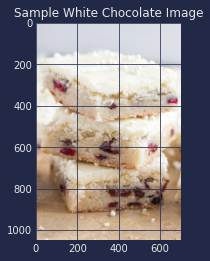

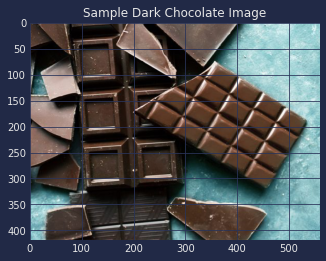

In [40]:
# print("Sample White Chocolate Image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_WHITE_CHOCOLATE_DIR, os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)[0])}"))
plt.title("Sample White Chocolate Image")
plt.show()

# print("\nSample Dark Chocolate Image:")
plt.imshow(load_img(f"{os.path.join(TRAINING_DARK_CHOCOLATE_DIR, os.listdir(TRAINING_DARK_CHOCOLATE_DIR)[4])}"))
plt.title("Sample Dark Chocolate Image")
plt.show()

In [41]:
# Load the first example of a white chocolate
sample_image  = load_img(f"{os.path.join(TRAINING_WHITE_CHOCOLATE_DIR, os.listdir(TRAINING_WHITE_CHOCOLATE_DIR)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"First sample image has shape: {sample_array.shape}")

First sample image has shape: (1050, 700, 3)


In [42]:
# Load the first example of a dark chocolate
sample_image  = load_img(f"{os.path.join(TRAINING_DARK_CHOCOLATE_DIR, os.listdir(TRAINING_DARK_CHOCOLATE_DIR)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Second sample image has shape: {sample_array.shape}")

Second sample image has shape: (1200, 1600, 3)


<a id="5"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Generation</p>


So we can see all the images are not in same shape.</br>
Now we will create data generators without using data augmentation 

In [24]:
#  Creating the training and validation data generators
def train_val_generators1(TRAINING_DIR, VALIDATION_DIR):

  # Instantiating the ImageDataGenerator class also normalization but no augmentation
    train_datagen1 = ImageDataGenerator(rescale=1.0/255.0)

    train_generator1 = train_datagen1.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode="binary",
                                                      target_size=(400, 400))

  
    validation_datagen1 = ImageDataGenerator(rescale=1.0/255)
  
    validation_generator1 = validation_datagen1.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=2,
                                                                class_mode="binary",
                                                                target_size=(400, 400))


    return train_generator1, validation_generator1

In [25]:
# Testing the generators
train_generator1, validation_generator1 = train_val_generators1(TRAINING_DIR, VALIDATION_DIR)

Found 123 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


<a id="6"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Creating Model</p>

In [26]:
def create_model():

    model = tf.keras.models.Sequential([ 
            tf.keras.layers.Conv2D(16, (3,3), activation = "relu", input_shape = (400,400,3)),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
            tf.keras.layers.MaxPool2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = "relu"),
            tf.keras.layers.Dense(1, activation = "sigmoid")
            ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(optimizer = RMSprop(learning_rate = 0.001),
                  loss = "binary_crossentropy",
                  metrics = ['accuracy']) 
    

    return model

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):

        if(logs.get('accuracy') == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [28]:
model1 = create_model()

# Training the model
history1 = model1.fit(train_generator1,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator1,
                    callbacks=[callbacks])

Epoch 1/50
13/13 [==============================] - 12s 798ms/step - loss: 21.4435 - accuracy: 0.4878 - val_loss: 0.5275 - val_accuracy: 0.6429
Epoch 2/50
13/13 [==============================] - 10s 793ms/step - loss: 1.2936 - accuracy: 0.7236 - val_loss: 1.8418 - val_accuracy: 0.5000
Epoch 3/50
13/13 [==============================] - 11s 825ms/step - loss: 1.2073 - accuracy: 0.7154 - val_loss: 0.3208 - val_accuracy: 0.7857
Epoch 4/50
13/13 [==============================] - 11s 775ms/step - loss: 0.6943 - accuracy: 0.8130 - val_loss: 2.1232 - val_accuracy: 0.5000
Epoch 5/50
13/13 [==============================] - 10s 771ms/step - loss: 0.7644 - accuracy: 0.7967 - val_loss: 0.2893 - val_accuracy: 0.8571
Epoch 6/50
13/13 [==============================] - 11s 817ms/step - loss: 0.2102 - accuracy: 0.9024 - val_loss: 0.7875 - val_accuracy: 0.7143
Epoch 7/50
13/13 [==============================] - 10s 800ms/step - loss: 0.0886 - accuracy: 0.9756 - val_loss: 0.1452 - val_accuracy: 0.928

<a id="7"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model's Performance</p>

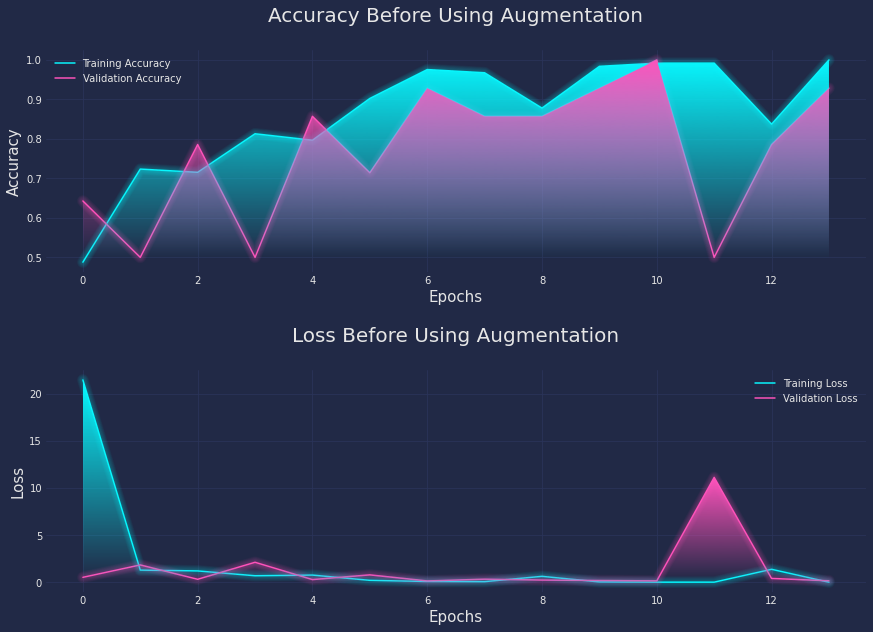

In [29]:
acc1=history1.history["accuracy"]
val_acc1=history1.history["val_accuracy"]
loss1=history1.history["loss"]
val_loss1=history1.history["val_loss"]

epochs1=range(len(acc1)) # number of epochs

import mplcyberpunk
plt.style.use("cyberpunk")

_, axs = plt.subplots(2,1,figsize=(14,10))
plt.tight_layout(pad=8.0)

axs[0].plot(epochs1, acc1, label= "Training Accuracy")
axs[0].plot(epochs1, val_acc1, label= "Validation Accuracy")
axs[0].set_title("Accuracy Before Using Augmentation\n",fontsize=20)
axs[0].set_xlabel("Epochs",fontsize=15)
axs[0].set_ylabel("Accuracy",fontsize=15)
axs[0].legend()

axs[1].plot(epochs1, loss1, label= "Training Loss")
axs[1].plot(epochs1, val_loss1, label= "Validation Loss")
axs[1].set_title("Loss Before Using Augmentation\n",fontsize=20)
axs[1].set_xlabel("Epochs",fontsize=15)
axs[1].set_ylabel("Loss",fontsize=15)
axs[1].legend()

mplcyberpunk.add_glow_effects(axs[0],gradient_fill=True)
mplcyberpunk.add_glow_effects(axs[1],gradient_fill=True) 
sns.despine(left=True, bottom=True) 
plt.show()

We've used a simple CNN architecture and we can clearly see that it's overfitting. Let's see what happens if we augment the training data.

<a id="8"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Generation Using Augmentation</p>

In [30]:
#  Creating the training and validation data generators
def train_val_generators2(TRAINING_DIR, VALIDATION_DIR):

  # Instantiating the ImageDataGenerator class also normalization with data augmentation
    train_datagen2 = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True)

    train_generator2 = train_datagen2.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode="binary",
                                                      target_size=(400, 400))

  
    validation_datagen2 = ImageDataGenerator(rescale=1.0/255)
  
    validation_generator2 = validation_datagen2.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=2,
                                                                class_mode="binary",
                                                                target_size=(400, 400))


    return train_generator2, validation_generator2

In [31]:
# Testing the generators
train_generator2, validation_generator2 = train_val_generators2(TRAINING_DIR, VALIDATION_DIR)

Found 123 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [32]:
model2 = create_model()

# Training the model
history2 = model2.fit(train_generator2,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator2,
                    callbacks=[callbacks])

Epoch 1/50
13/13 [==============================] - 16s 1s/step - loss: 12.0248 - accuracy: 0.5041 - val_loss: 0.6433 - val_accuracy: 0.7857
Epoch 2/50
13/13 [==============================] - 15s 1s/step - loss: 0.7465 - accuracy: 0.5854 - val_loss: 0.4902 - val_accuracy: 0.7143
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 0.6394 - accuracy: 0.6423 - val_loss: 0.5106 - val_accuracy: 0.7143
Epoch 4/50
13/13 [==============================] - 15s 1s/step - loss: 1.3263 - accuracy: 0.6504 - val_loss: 0.3936 - val_accuracy: 0.7143
Epoch 5/50
13/13 [==============================] - 15s 1s/step - loss: 0.5030 - accuracy: 0.8049 - val_loss: 0.3227 - val_accuracy: 0.8571
Epoch 6/50
13/13 [==============================] - 15s 1s/step - loss: 1.2456 - accuracy: 0.6341 - val_loss: 0.5727 - val_accuracy: 0.7143
Epoch 7/50
13/13 [==============================] - 15s 1s/step - loss: 0.6079 - accuracy: 0.6911 - val_loss: 1.6132 - val_accuracy: 0.5000
Epoch 8/50
13/13 [=

<a id="9"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Performance Using Augmentation</p>

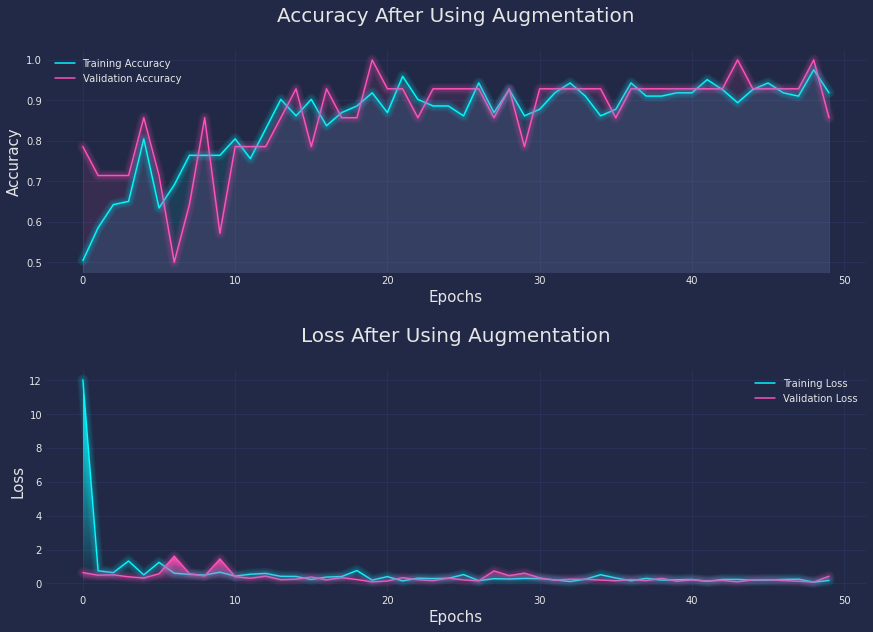

In [33]:
acc2=history2.history["accuracy"]
val_acc2=history2.history["val_accuracy"]
loss2=history2.history["loss"]
val_loss2=history2.history["val_loss"]

epochs2=range(len(acc2)) # number of epochs

_, axs = plt.subplots(2,1,figsize=(14,10))
plt.tight_layout(pad=8.0)

axs[0].plot(epochs2, acc2, label= "Training Accuracy")
axs[0].plot(epochs2, val_acc2, label= "Validation Accuracy")
axs[0].set_title("Accuracy After Using Augmentation\n",fontsize=20)
axs[0].set_xlabel("Epochs",fontsize=15)
axs[0].set_ylabel("Accuracy",fontsize=15)
axs[0].legend()

axs[1].plot(epochs2, loss2, label= "Training Loss")
axs[1].plot(epochs2, val_loss2, label= "Validation Loss")
axs[1].set_title("Loss After Using Augmentation\n",fontsize=20)
axs[1].set_xlabel("Epochs",fontsize=15)
axs[1].set_ylabel("Loss",fontsize=15)
axs[1].legend()

mplcyberpunk.add_glow_effects(axs[0],gradient_fill=False)
mplcyberpunk.add_glow_effects(axs[1],gradient_fill=True) 
sns.despine(left=True, bottom=True) 
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Performance Evaluation</p>

Let's visualize the difference of our model's performance when we used augmentation and when we did not.

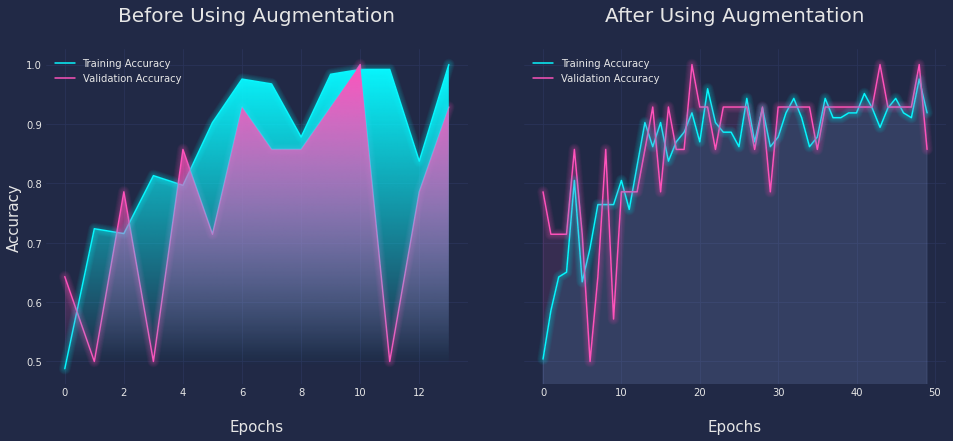

In [34]:
_, axs = plt.subplots(1,2,figsize=(14,6),sharey=True)
plt.tight_layout(pad=4.0)

axs[0].plot(epochs1, acc1, label= "Training Accuracy")
axs[0].plot(epochs1, val_acc1, label= "Validation Accuracy")
axs[0].set_title("Before Using Augmentation\n",fontsize=20)
axs[0].set_xlabel("\nEpochs",fontsize=15)
axs[0].set_ylabel("Accuracy",fontsize=15)
axs[0].legend()

axs[1].plot(epochs2, acc2, label= "Training Accuracy")
axs[1].plot(epochs2, val_acc2, label= "Validation Accuracy")
axs[1].set_title("After Using Augmentation\n",fontsize=20)
axs[1].set_xlabel("\nEpochs",fontsize=15)
axs[1].legend()

mplcyberpunk.add_glow_effects(axs[0],gradient_fill=True)
mplcyberpunk.add_glow_effects(axs[1],gradient_fill=False) 
sns.despine(left=True, bottom=True) 
plt.show()

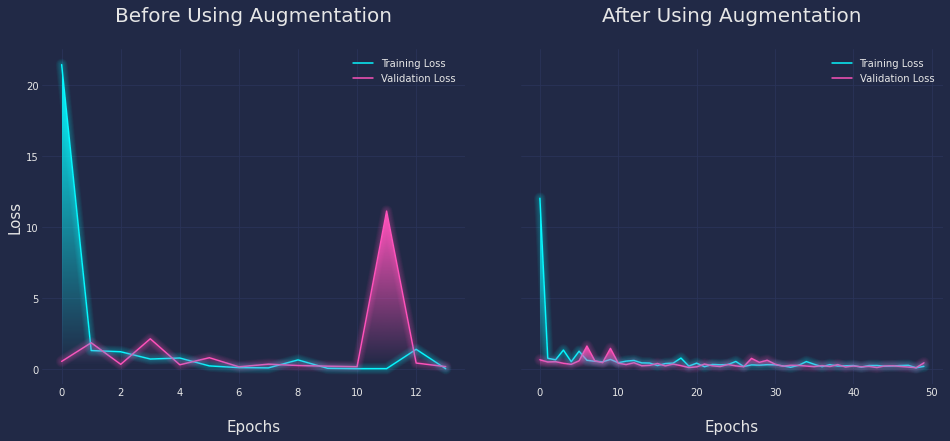

In [35]:
_, axs = plt.subplots(1,2,figsize=(14,6),sharey=True)
plt.tight_layout(pad=4.0)

axs[0].plot(epochs1, loss1, label= "Training Loss")
axs[0].plot(epochs1, val_loss1, label= "Validation Loss")
axs[0].set_title("Before Using Augmentation\n",fontsize=20)
axs[0].set_xlabel("\nEpochs",fontsize=15)
axs[0].set_ylabel("Loss",fontsize=15)
axs[0].legend()

axs[1].plot(epochs2, loss2, label= "Training Loss")
axs[1].plot(epochs2, val_loss2, label= "Validation Loss")
axs[1].set_title("After Using Augmentation\n",fontsize=20)
axs[1].set_xlabel("\nEpochs",fontsize=15)
axs[1].legend()

mplcyberpunk.add_glow_effects(axs[0],gradient_fill=True)
mplcyberpunk.add_glow_effects(axs[1],gradient_fill=True) 
sns.despine(left=True, bottom=True) 
plt.show()

The dataset is quite small. We have seen it's overfitting when we simply used the normal architecture. Then we've used data augmentation to overcome the issue. And finally we can see after using data augmentation our simple architecture is also recovering the issue. If we fine tune the hyperparameters we can hope this simple architecture will perform much better than this.

<a id="11"></a>
# <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>

<p>
<h3><font color="#324459">If you liked this notebook please upvote. Your feedback will be highly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Hasib Al Muzdadid</h3>

<b>👉Shoot me mails :</b> muzdadid@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/hasibalmuzdadid <br>
<b>👉Explore Github :</b> https://github.com/HasibAlMuzdadid    
    
</p> 